<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', np.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

### Pregunta 1: rango de los datos

In [9]:
# Pregunta 1: Rango de los datos
rango_datos = pandas.DataFrame(columns= score_cols, index=['range'])

# Iterar por columnas del data frame
for column in score_cols:
           col_range = dataset[column].max() - dataset[column].min() 
           rango_datos.loc['range', column] = col_range

rango_datos

,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
range,10,10,10,10,10,10,7.34,161,6.53,161,5.43,161


Cómo se puede apreciar, en el caso de las variables que tienen un score pre definido (0, 10), su rango es igual o menos a dicho intervalo. En el caso del ranking, el largo del intervalo es igual a la cantidad de paises analizados y consecuentemente también igaul al rango de la variable.

### Pregunta 2: Estadadísticas descriptivas

In [10]:
dataset.groupby(['countries'])[['pf_identity', 'hf_score']].describe()

pf_identity                                                   \
                  count   mean       std   min     25%   50%   75%   max   
countries                                                                  
Albania            10.0   7.90  1.449138   5.8   6.550   8.8   8.8   8.8   
Algeria            10.0   1.17  0.411096   0.0   1.300   1.3   1.3   1.3   
Angola             10.0   5.34  0.716783   5.0   5.000   5.0   5.0   6.7   
Argentina          10.0  10.00  0.000000  10.0  10.000  10.0  10.0  10.0   
Armenia            10.0   8.62  0.289828   8.2   8.350   8.8   8.8   8.8   
...                 ...    ...       ...   ...     ...   ...   ...   ...   
Venezuela          10.0   8.76  2.109344   4.2   7.525  10.0  10.0  10.0   
Vietnam            10.0   9.72  0.454117   9.0   9.400  10.0  10.0  10.0   
Yemen, Rep.         8.0   0.00  0.000000   0.0   0.000   0.0   0.0   0.0   
Zambia             10.0   4.83  0.856414   2.5   5.000   5.0   5.0   5.8   
Zimbabwe           10.0   6.67  1.354047   4.2   5.625   7.5   7.5   7.5   

            hf_score                                                        
               count     mean       std   min     25%    50%     75%   max  
countries                                                                   
Albania         10.0  7.63100  0.132115  7.44  7.5350  7.675  7.7050  7.84  
Algeria         10.0  5.16500  0.105225  4.99  5.0825  5.180  5.2500  5.29  
Angola          10.0  5.44200  0.245303  5.02  5.3550  5.420  5.4400  5.89  
Argentina       10.0  6.76600  0.264835  6.27  6.5725  6.805  6.9525  7.10  
Armenia         10.0  7.44300  0.063953  7.34  7.4125  7.425  7.5000  7.53  
...              ...      ...       ...   ...     ...    ...     ...   ...  
Venezuela       10.0  4.71200  0.542357  3.80  4.2225  4.930  5.1575  5.27  
Vietnam         10.0  6.19400  0.132514  6.06  6.0775  6.145  6.3050  6.40  
Yemen, Rep.      8.0  4.60375  0.397490  4.19  4.2775  4.600  4.7525  5.40  
Zambia          10.0  6.63700  0.161386  6.39  6.5175  6.660  6.6850  6.92  
Zimbabwe        10.0  5.32200  0.339863  4.91  5.0025  5.320  5.6275  5.73  

[162 rows x 16 columns]

Las medidas de resumen sirven para describir en forma resumida un conjunto de datos que constituyen una muestra tomada de alguna población.

Una propiedad importante de los métodos de EDA son que sean resistentes y robustos. Estas características hacen referencia a la sensibilidad de dichos métodos a las aunciones acerca de la naturaleza de los datos. Un método robusto no es necesariamente el mejor en todas las circunstancias pero se comporta razonablemente bien en la mayoría de ellas. Por ejemplo, la media es el mejor descriptor del centro de masa de una muestra, si se sabe que esa muestra tiene una distribución Gaussiana. Sin embargo, si los datos son decididamente no Gaussianos, la media no sería una caracterización confiable del centro de la distribución. Los métodos robustos serían menos sensibles a las distribución de los datos y la influencia de outliers. El metodo robusto más comúnmente usado es la mediana, o el cuantil 0.5. 

Por lo anterior, se considera que la mediana es una medida de posición más apropiada para la caracterización de los datos. 

Con respescto a los desvíos, lo mismo aplica para el desvío estándar. Ésta no es una medida ni resisitente, ni robusta. Aún un solo valor muy atípico afectará la medida porque la diferencia con la media será muy grande y además será elevada al cuadrado. Una mejor alternativa es el MAD (mediana de los desvíos absolutos) y que además tiene un procesos de cálculo similar al desvío estándar por lo que es fácil de interpretar. 

### Pregunta 3: Comparacion estadisticas mundiales vs Latam

In [11]:
world_summary = pandas.DataFrame(index = ['pf_identity', 'hf_score'], columns=['region', 'mean', 'median', 'sd'])
world_summary['region'] = 'World'           
                  
# pf_identity summary
world_summary.loc['pf_identity', 'mean'] = dataset.pf_identity.mean()
world_summary.loc['pf_identity', 'median'] = dataset.pf_identity.median()
world_summary.loc['pf_identity', 'sd'] = dataset.pf_identity.std()

# hf_score summary
world_summary.loc['hf_score','mean'] = dataset.hf_score.mean()
world_summary.loc['hf_score','median'] = dataset.hf_score.median()
world_summary.loc['hf_score','sd'] = dataset.hf_score.std()

world_summary

,region,mean,median,sd
pf_identity,World,7.28065,8.8,3.18158
hf_score,World,6.97821,6.9,1.05624


La media es una buena medida de posición aunque es sensible a outliers. 
Por lo tanto, una medida como la mediana es más resistente y no se vé tan 
alterada por cambios bruscos en la serie de tiempo. 

In [12]:
latam_summary = pandas.DataFrame(index = ['pf_identity', 'hf_score'], columns=['region', 'mean', 'median', 'sd'])
latam_summary['region'] = 'Latam' 

# Latam 
latam_dataset = dataset[dataset.region == 'Latin America & the Caribbean']
latam_dataset

# pf_identity summary
latam_summary.loc['pf_identity', 'mean'] = latam_dataset.pf_identity.mean()
latam_summary.loc['pf_identity', 'median'] = latam_dataset.pf_identity.median()
latam_summary.loc['pf_identity', 'sd'] = latam_dataset.pf_identity.std()

# hf_score summary
latam_summary.loc['hf_score','mean'] = latam_dataset.hf_score.mean()
latam_summary.loc['hf_score', 'median'] = latam_dataset.hf_score.median()
latam_summary.loc['hf_score', 'sd'] = latam_dataset.hf_score.std()

latam_summary

,region,mean,median,sd
pf_identity,Latam,8.58217,10,1.87583
hf_score,Latam,7.03698,7.02,0.634897


In [13]:
global_summary = world_summary.append(latam_summary)

global_summary.index.name = 'index'
global_summary.reset_index(inplace=True)

global_summary

,index,region,mean,median,sd
0,pf_identity,World,7.28065,8.8,3.18158
1,hf_score,World,6.97821,6.9,1.05624
2,pf_identity,Latam,8.58217,10,1.87583
3,hf_score,Latam,7.03698,7.02,0.634897


In [14]:
global_summary = pandas.melt(global_summary, id_vars = ['index', 'region'], value_vars=['mean', 'median', 'sd'])

global_summary

,index,region,variable,value
0,pf_identity,World,mean,7.28065
1,hf_score,World,mean,6.97821
2,pf_identity,Latam,mean,8.58217
3,hf_score,Latam,mean,7.03698
4,pf_identity,World,median,8.8
5,hf_score,World,median,6.9
6,pf_identity,Latam,median,10
7,hf_score,Latam,median,7.02
8,pf_identity,World,sd,3.18158
9,hf_score,World,sd,1.05624


In [52]:
global_summary_pf_identity.pivot(index = "variable", columns = "region", values = "value")

region,Latam,World
variable,,
mean,8.58217,7.28065
median,10,8.8
sd,1.87583,3.18158


<Figure size 1152x864 with 0 Axes>

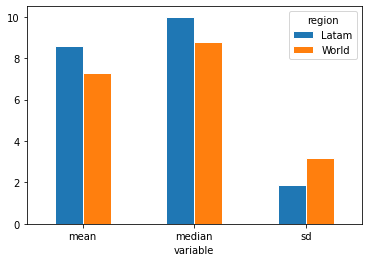

In [15]:
global_summary_pf_identity = global_summary[global_summary['index'] == 'pf_identity']

global_summary_pf_identity

#rearrange dataframe and plot
plt.figure(figsize=(16, 12))
global_summary_pf_identity.pivot(index = "variable", columns = "region", values = "value").plot.bar(edgecolor = "white")
plt.xticks(rotation = 0)
plt.show()

La variable de Identity dentro de Personal Freedom, tiene mayores valores en la muestra de Latam & Caribe. 
A su vez, su desviación estandar es menor. Por lo que podemos decir que los habitantes de los países 
latinoamericanos son -en promedio- homogeneamente más libres que el resto del mundo en términos de identidad. 

Sin embargo debido a la explicación del punto anterior y a la volatilidad presentada en los datos, sobre todo a nivel mundial, no podríamos decir que cualquier país de LatAm es más libre que cualquier país del resto del mundo.

<Figure size 720x432 with 0 Axes>

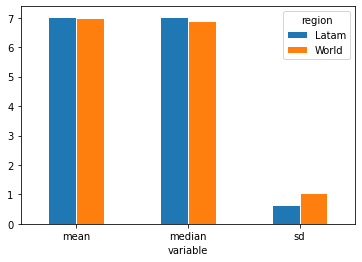

In [16]:
global_summary_hf_score = global_summary[global_summary['index'] == 'hf_score']

global_summary_hf_score

#rearrange dataframe and plot
plt.figure(figsize=(10, 6))
global_summary_hf_score.pivot(index = "variable", columns = "region", values = "value").plot.bar(edgecolor = "white")
plt.xticks(rotation = 0)
plt.show()

La variable de Human Freedom dentro de Score, tiene levementente mayores valores en la muestra de Latam & Caribe. A su vez, su desviación estandar es menor. Por lo que podríamos decir que los habitantes de los paises latinoamericanos son homogeneamente más libres que el resto del mundo en términos de identidad. Sin embargo la diferencia es tan acotada que debería corroborarse esta conclusión con un test de hipótesis de diferencia de medias, ya que es una afirmación cuestionable con solo los datos presentados.


#### Pregunta 4: 4.	¿Tiene sentido calcular la moda?
La moda tiene sentido analizarla en conjunto con la Media y la Mediana,
para entender la forma de la distribución. En general se analizan las tres medidas juntas en busca de asimetrías laterales.

#### Pregunta 5:   ¿Cómo pueden sanearse los valores faltantes?

Se puede utilizar el método de filna(). La pregunta es con qué llenar los datos faltantes, y va a depender de la
variable en cuestión. En este caso analizado, se podría utilizar la media o mediana para intentar tener el menor impacto posible sobre comparaciones. 

Si es un dato faltante de un año para un país, se podría utilizar la media de dicho país para esa variable, para lograr el menor impacto posible sobre los valores del país. 

También se podría incorporar alguna corrección según la tendencia de la región / mundo para esa variable entre los años que se poseen datos. 

El punto más importante a recalcar es que cualquier modificación de los datos crudos van a impactar a en los análisis sobre el dataset,  se debería considerar si simplemente NO utilizar ese dato, línea o columna, no es una mejor opción.

#### Pregunta 6: ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos? 

No hay outliers en estas dos variables puesto que estan acotadas en un rango relativamente estrecho. Se podría en primer lugar graficar las distribuciones para encontrar outliers, o analíticamente buscar aquellas realizacionesque se encuentren a una distancia mayor a mas de N veces la desviación con respecto de la media.

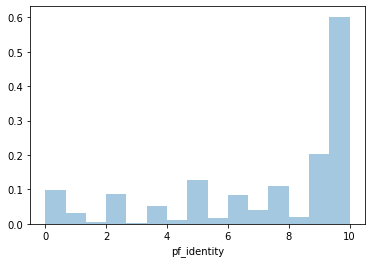

In [53]:
seaborn.distplot(dataset.pf_identity, bins=15, kde=False, norm_hist=True)  # Histograma con densidades

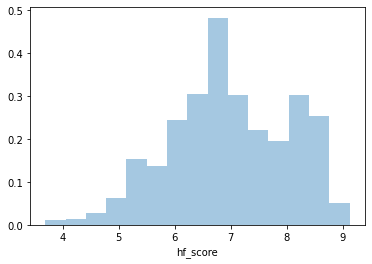

In [17]:
seaborn.distplot(dataset.hf_score, bins=15, kde=False, norm_hist=True)  # Histograma con densidades

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

#### Pregunta 1: Grafico de las variables a través de los años para el mundo

(0.0, 10.0)

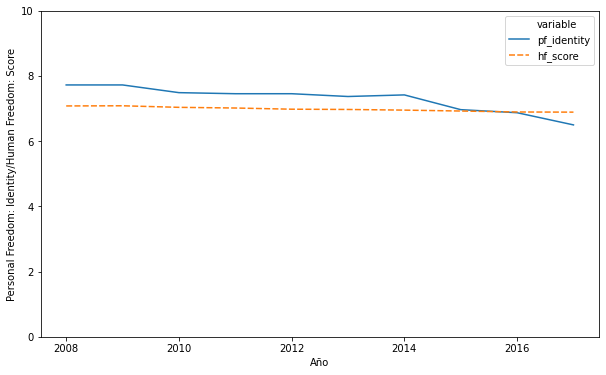

In [18]:
world_time_series = dataset.groupby(['year'])[['pf_identity', 'hf_score']].mean()
world_time_series.index.name = 'year'
world_time_series.reset_index(inplace=True)

world_time_series = pandas.melt(world_time_series, id_vars = ['year'], value_vars=['pf_identity', 'hf_score'])

plt.figure(figsize=(10,6))
ax = seaborn.lineplot(x = "year", y = "value",
                  hue = "variable", style = "variable", data = world_time_series)
plt.ylabel('Personal Freedom: Identity/Human Freedom: Score')
plt.xlabel('Año')
plt.ylim(0, 10)

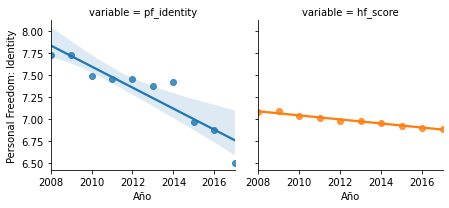

In [19]:
#xsize = plt.figure(figsize=(10,6))
g = seaborn.FacetGrid(world_time_series, col="variable", col_wrap = 5, hue = 'variable')
g.map(seaborn.regplot, "year", "value");
g.set_axis_labels('Año', "Personal Freedom: Identity");

#### Pregunta 2: Grafico de las variables a través de los años para las regiones

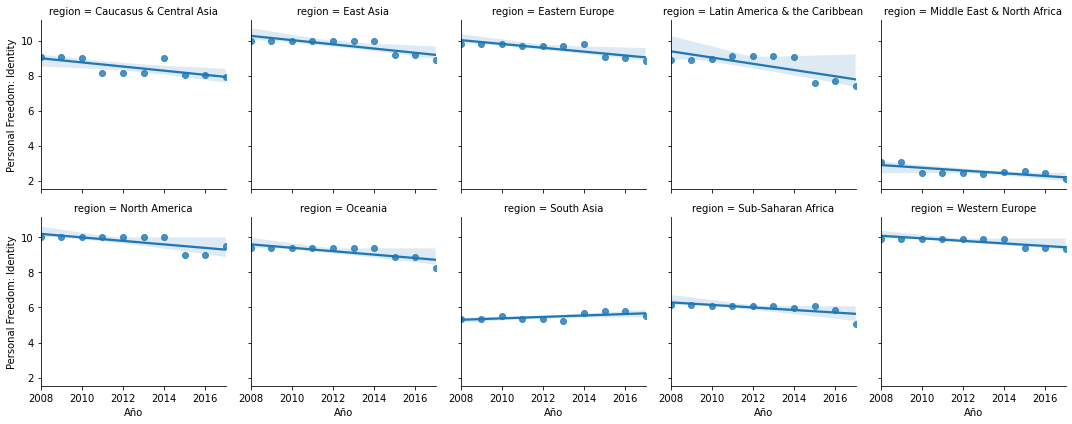

In [20]:
region_time_series = dataset.groupby(['year', 'region'])[['pf_identity', 'hf_score']].mean()
region_time_series.index.name = 'year'
region_time_series.reset_index(inplace=True)

region_time_series = pandas.melt(region_time_series, id_vars = ['year', 'region'], value_vars=['pf_identity', 'hf_score'])

region_time_series_pf_identity = region_time_series[region_time_series['variable'] == 'pf_identity']
region_time_series_pf_identity

g = seaborn.FacetGrid(region_time_series_pf_identity, col="region", col_wrap=5, hue = 'variable')
g.map(seaborn.regplot, "year", "value");
g.set_axis_labels('Año', "Personal Freedom: Identity")


La tendencia decreciente a través del tiempo para Personal Freedom: Identity, parece ser bastante consistente a través de las regiones. La única región con un comportamiento distinto es South Asia, con una leve mejoría pero partiendo desde una situación bastante peor que la mayoría de las otras regiones.

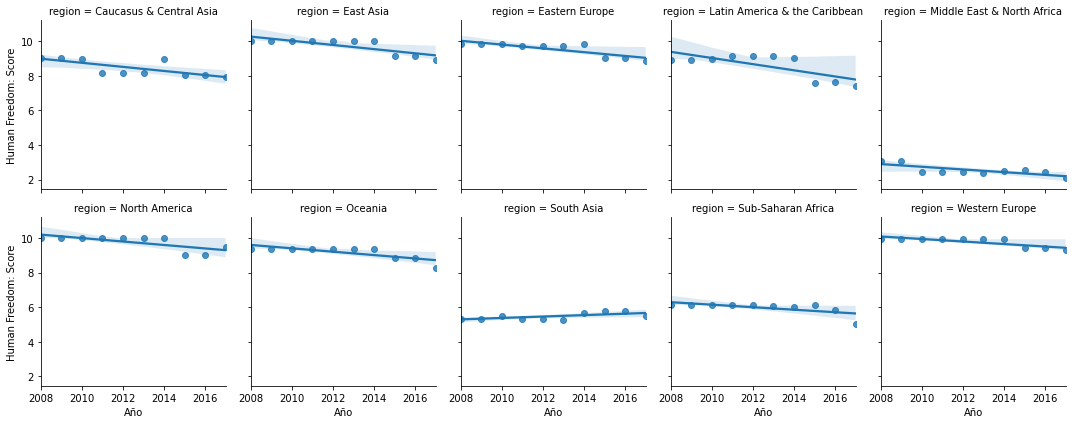

In [54]:
region_time_series_hf_score = region_time_series[region_time_series['variable'] == 'hf_score']
region_time_series_hf_score

g = seaborn.FacetGrid(region_time_series_pf_identity, col="region", col_wrap=5, hue = 'variable')
g.map(seaborn.regplot, "year", "value");
g.set_axis_labels('Año', "Human Freedom: Identity");

La tendencia decreciente a través del tiempo para Human Freedom: Score, al igual que el caso anterior, se muestra consistente  a en todas las regiones. La única región con un comportamiento distinto  nuevamente es South Asia. Si vale la pena destacar que los puntos de partida o niveles son diferentes a lo largo de las regiones, y que más allá de la tendencia los valores de Middle East & North Africa sobre todo, y South Asia y Sub-Saharan Africa parecieran ser los que disminuyen el índice global.

#### Pregunta 3: Grafico de las variables a través de los años para el Latam

In [21]:
latam_dataset_time_series = latam_dataset[['year', 'countries', 'pf_identity']]

latam_time_series = pandas.melt(latam_dataset_time_series, id_vars = ['year', 'countries'], 
                                value_vars = ['pf_identity'])

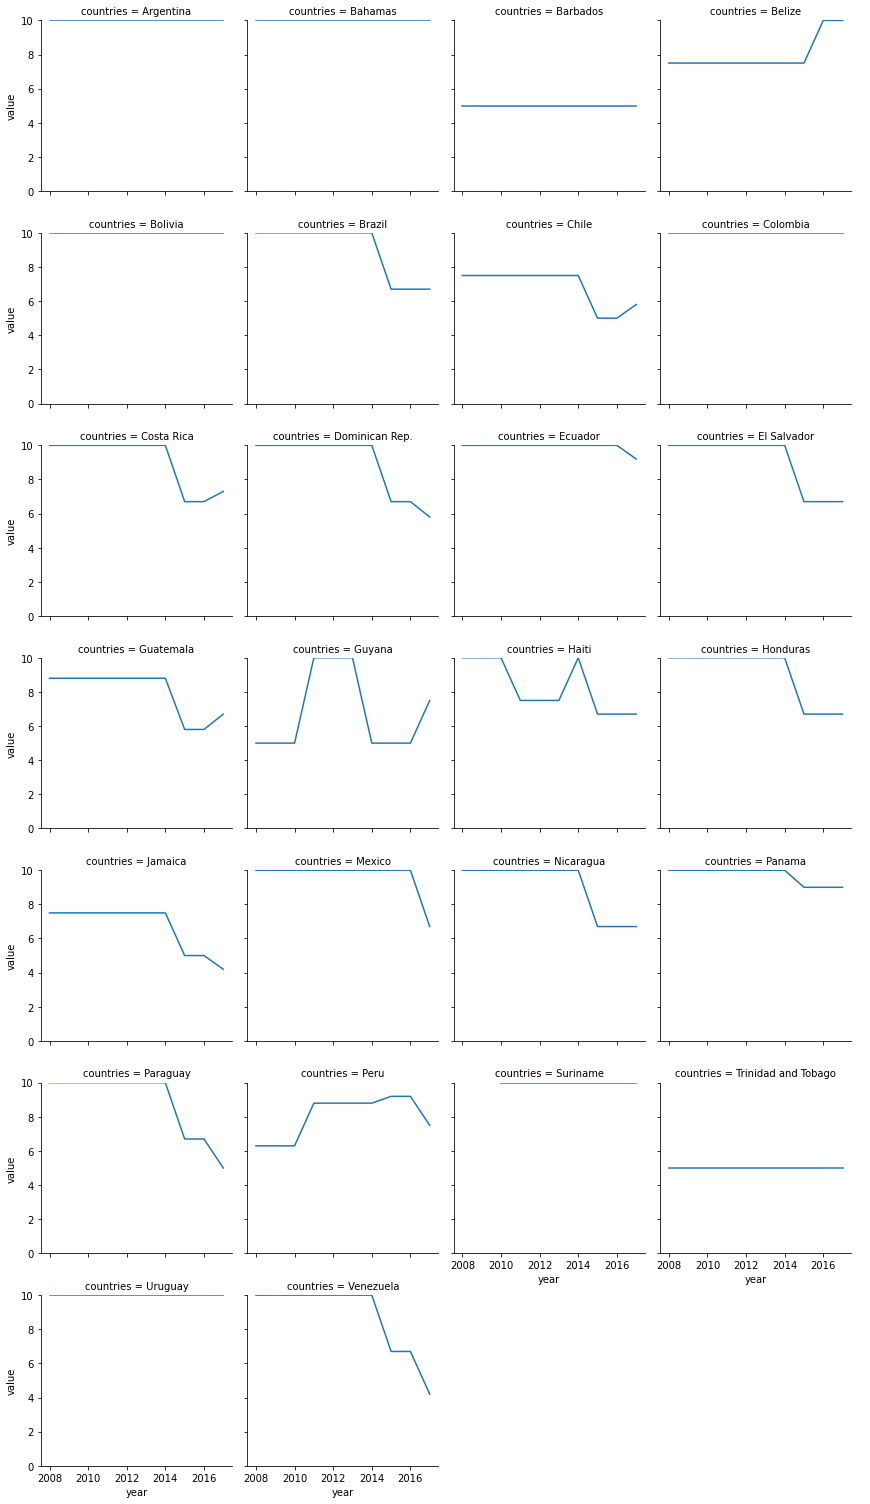

In [22]:
g = seaborn.FacetGrid(latam_time_series, col="countries", col_wrap=4, ylim = (0, 10))
g.map(plt.plot, "year", "value");
g.add_legend();

En muchos países se ve una caida significativa en 2015, aunque hay algunas excepciones. Paises como Venezuela y Paraguay tienen caidas abruptas de alrededor del 50% en solo tres años. Paises como Uruguay, Colombia y Bolivia se mantuvieron inalterados. Por lo tanto se observa una importante diversidad dentro de la misma región, entre paises vecinos.

(0.0, 10.0)

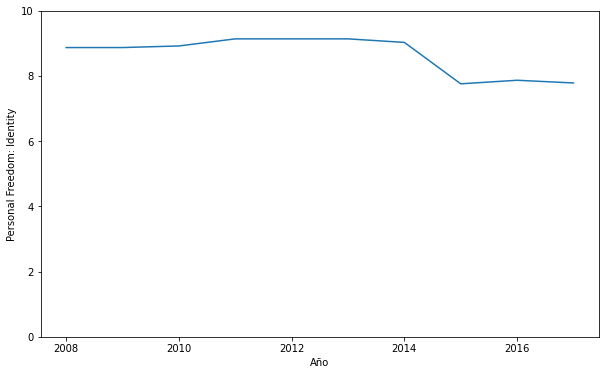

In [55]:
# Venezuela y Paraguay alteran bastante los resultados


countries = ['Venezuela', 'Paraguay', 'Jamaica']

latam_time_series_filtered = latam_time_series[~latam_time_series.countries.isin(countries)].groupby('year').mean()

latam_time_series_filtered


plt.figure(figsize=(10,6))
ax = seaborn.lineplot(x = latam_time_series_filtered.index, y = "value",
                  data = latam_time_series_filtered)
plt.ylabel('Personal Freedom: Identity')
plt.xlabel('Año')
plt.ylim(0, 10)

(0.0, 10.0)

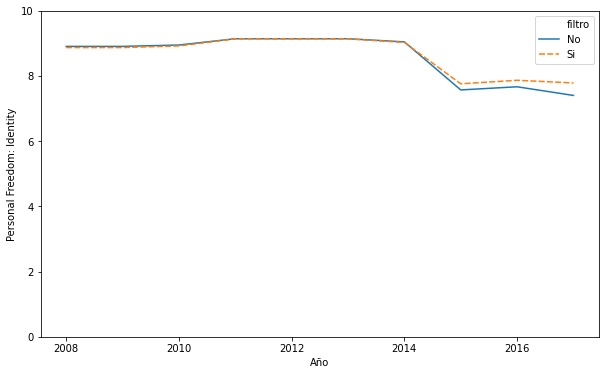

In [56]:
latam_time_series_unfiltered = latam_time_series.groupby('year').mean()
latam_time_series_unfiltered['filtro'] = 'No'

latam_time_series_filtered['filtro'] = 'Si'

latam_summary = latam_time_series_unfiltered.append(latam_time_series_filtered)

latam_summary.index.name = 'year'
latam_summary.reset_index(inplace=True)

plt.figure(figsize=(10,6))
ax = seaborn.lineplot(
    x = "year", 
    y = "value",
    hue = "filtro", 
    style = "filtro", 
    data = latam_summary
)
plt.ylabel('Personal Freedom: Identity')
plt.xlabel('Año')
plt.ylim(0, 10)

Removiendo los paises mencionados, podemos observar como cambia el índice.

Ejercicio opcional

Text(0.5, 0, 'Año')

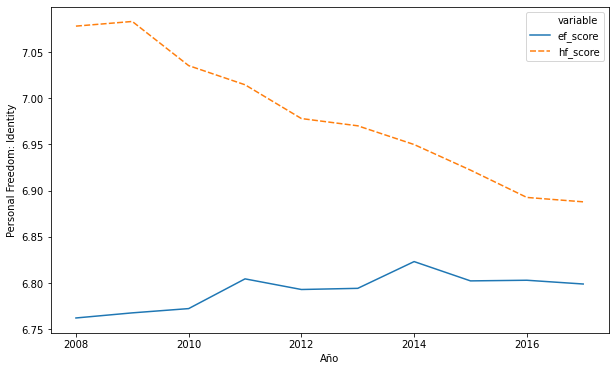

In [25]:
world_time_series = dataset.groupby(['year'])[['ef_score', 'hf_score']].mean()
world_time_series.index.name = 'year'
world_time_series.reset_index(inplace=True)

world_time_series = pandas.melt(world_time_series, id_vars = ['year'], value_vars=['ef_score', 'hf_score'])

plt.figure(figsize=(10,6))
ax = seaborn.lineplot(x = "year", y = "value",
                  hue = "variable", style = "variable", data = world_time_series)
plt.ylabel('Personal Freedom: Identity')
plt.xlabel('Año')


A lo largo de los años se observa una leve tendencia creciente en libertad económica, practicamente imperceptible, mientras que se ve un descenso mayor en los valores de libertad humana. Es dificil generar una hipótesis de dicho comportamiento sin un conocimiento profundo de la metodología a partir de la cuál se han generado tales valores.

# 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


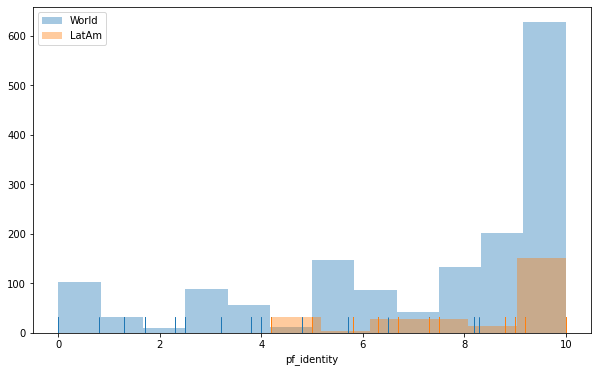

In [57]:
#Distribución de la variable **pf_identity** en el mundo
world_dataset = dataset

latam_dataset = world_dataset[world_dataset.region == 'Latin America & the Caribbean']

plt.figure(figsize=(10,6))
seaborn.distplot(world_dataset['pf_identity'].dropna(), label='World', kde=False, rug = True)
seaborn.distplot(latam_dataset['pf_identity'].dropna(), label='LatAm', kde=False, rug = True)
plt.legend()


La distribución de la variable pf_identity tiene una forma asimetrica derecha, similar a la que se podría obtener con una distribución Beta:

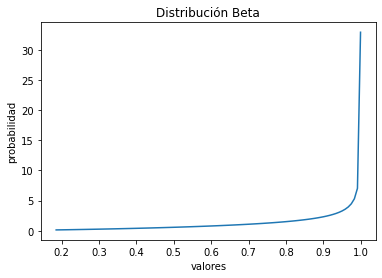

In [62]:
# Ejemplo distribución BETA,
a, b = 2.3, 0.6 # parametros de forma.
import scipy.stats as stats
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

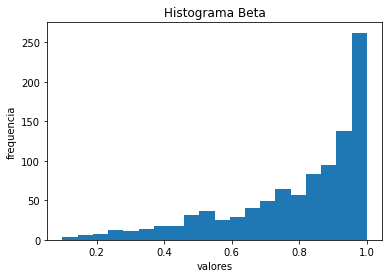

In [63]:
# Ejemplo distribución BETA, histograma

aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

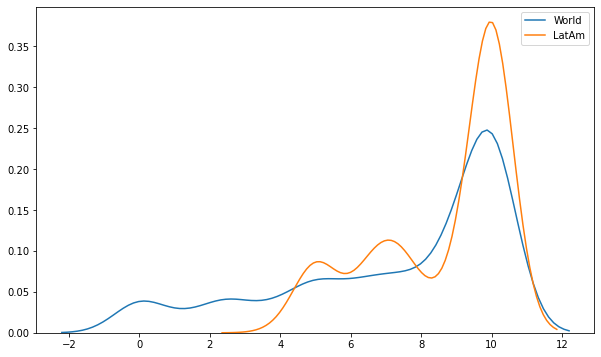

In [64]:
#Distribución de la variable **hf_score** en el mundo

plt.figure(figsize=(10,6))
seaborn.kdeplot(
    world_dataset['pf_identity'].dropna(), label='World'
)
seaborn.kdeplot(
    latam_dataset['pf_identity'].dropna(), label='LatAm'
)
plt.legend()



Alternativamente, para la Variable HF Scores se utilizó un gráfico de KDE. El KDE intenta suavizar la variable más alla de sus rangos, agregando nuevos valores que exceden los límites de la variable original: (-2,0) y (10,12). Por lo tanto esta visualizació puede tender a distorcionar su apreciación.

Habiendo limpiado los NaNs en las filas correspondientes, se utilizan todos los datos crudos para este punto. Dado que todos los valores estan definidos dentre un rango acotado, no pareciera haber outliers más allá del rango presentado. Sería un error por ejemplo reemplazar NaNs con "ceros", porque en ese caso estaríamos afectando directamente las mediciones.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



#### Pregunta 1.	¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

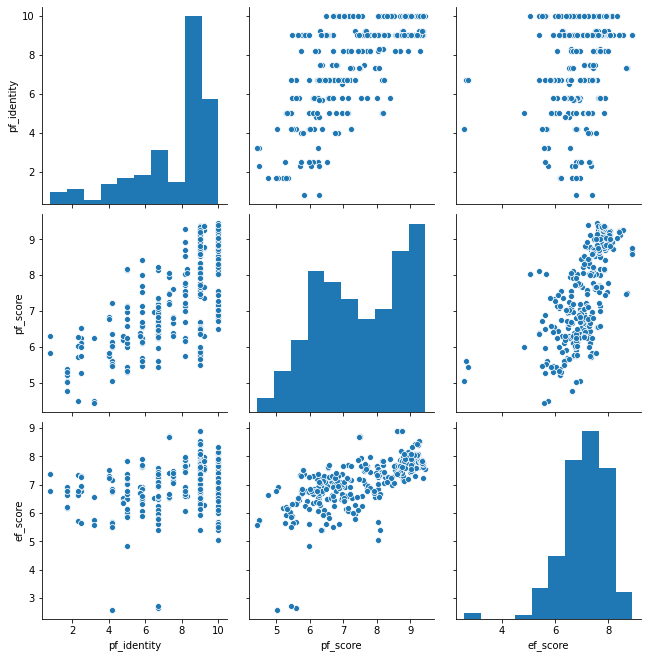

In [28]:
seaborn.pairplot(
    data = dataset.dropna(),
    vars=['pf_identity', 'pf_score', 'ef_score'],
    height=3
)

El pair plot muestra una correlación positiva entre el pf_identity y el pf_score, tal como se esperaba por su construcción. 

Además de ello, pareciera haber una correlación positiva entre ambos scores.

No pareciera haber una relación clara entre pf_identity y economic freedom.

##### Pregunta 2: 2.	Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones?  

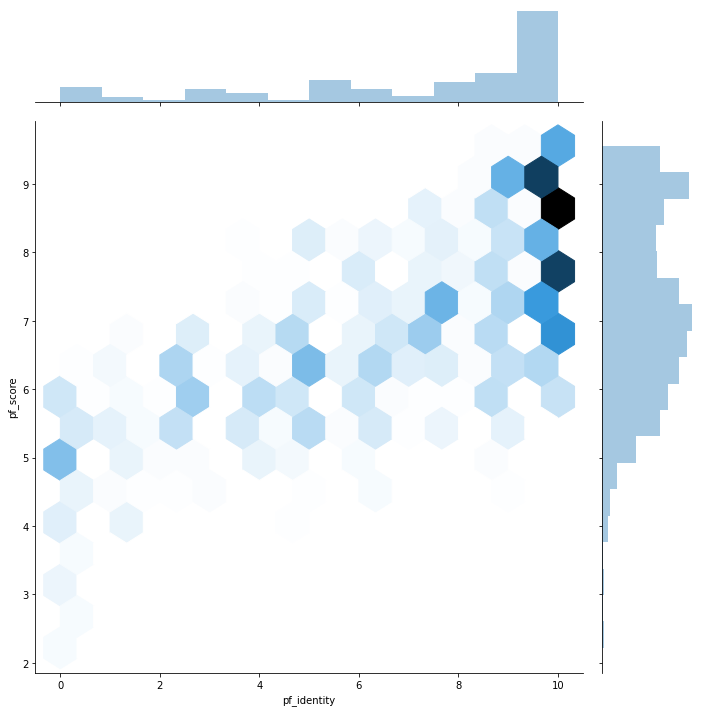

In [29]:
# Relacion entre pf_identity y pf_score
figsize=(15,6)
seaborn.jointplot(
    data = dataset, 
    x='pf_identity',
    y='pf_score',
    kind='hex', 
    height=10
)

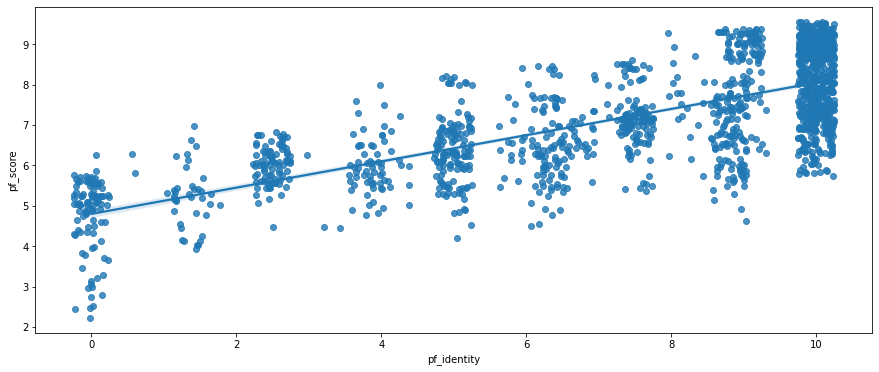

In [30]:
fig = plt.figure(figsize=(15,6))
seaborn.regplot(
    data=dataset, 
    x='pf_identity',
    y='pf_score',
    x_jitter=0.25
)

Ámbos gráficos denotan como antes, una relación positiva -esperada por construcción- entre Personal Freedom Identity y Score. Para el caso del Regplot se recurrio a usar Jittering para mejorar la apreciación visual.

<Figure size 1080x432 with 0 Axes>

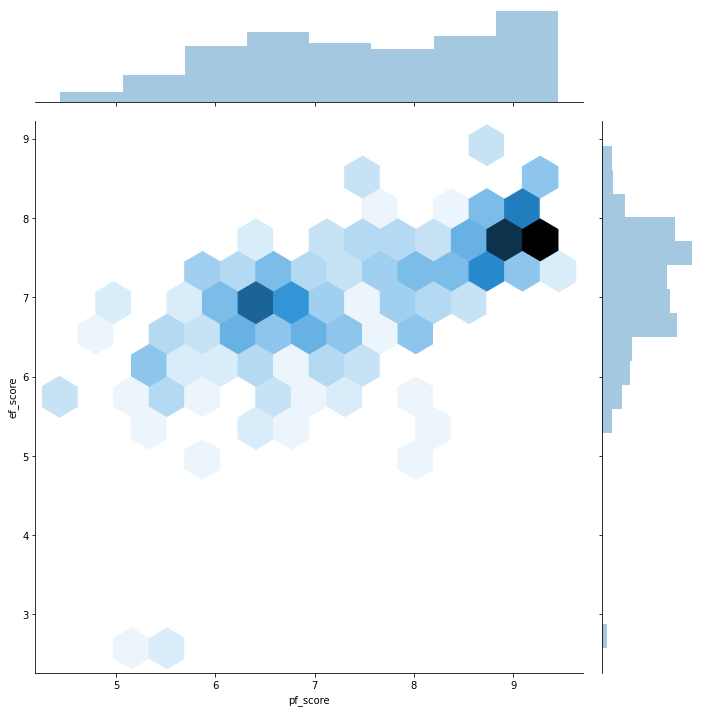

In [65]:
#Relacion entre hf_score y ef_score
fig = plt.figure(figsize=(15,6))
seaborn.jointplot(
    data=dataset.dropna(), 
    x='pf_score',
    y='ef_score',
    kind='hex', 
    height=10
)

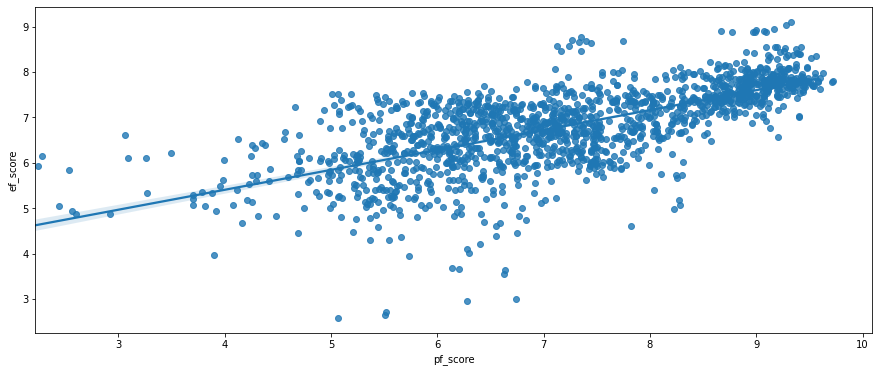

In [66]:
fig = plt.figure(figsize=(15,6))
seaborn.regplot(
    data=dataset, 
    x='pf_score',
    y='ef_score',
    x_jitter=0.25
)

En este segundo set de gráficos entre ambos Scores, Personal Freedom y Economic Freedom, vemos una relación positiva. 

In [33]:
#### Relacion entre pf_identity y ef_score

<Figure size 1080x432 with 0 Axes>

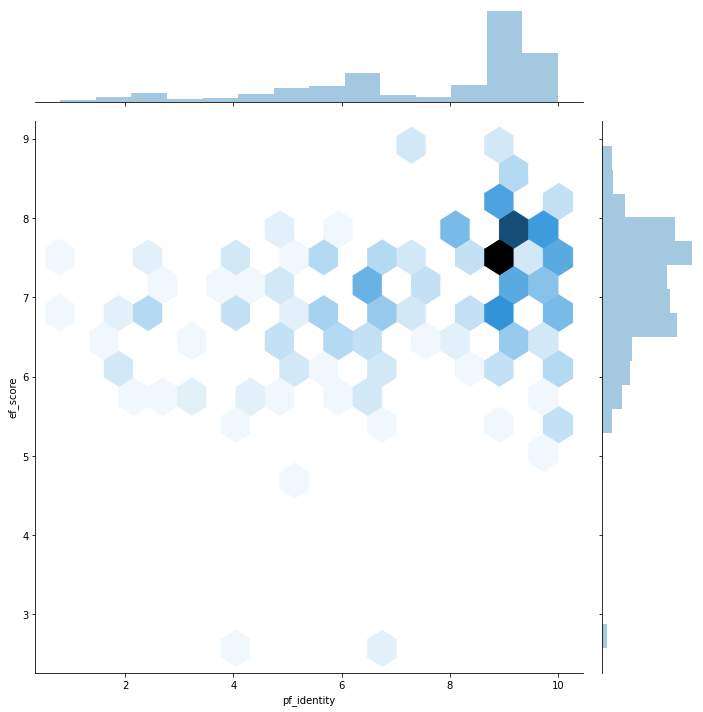

In [34]:
fig = plt.figure(figsize=(15,6))
seaborn.jointplot(
    data=dataset.dropna(), 
    x='pf_identity',
    y='ef_score',
    kind='hex', 
    height=10
)

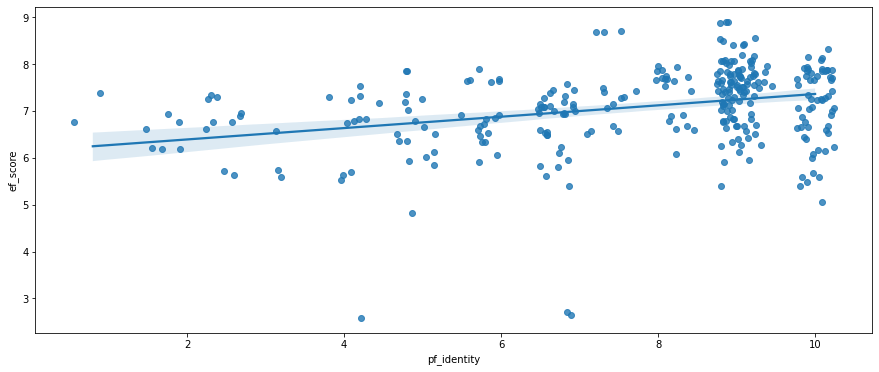

In [35]:
fig = plt.figure(figsize=(15,6))
seaborn.regplot(
    data=dataset.dropna(), 
    x='pf_identity',
    y='ef_score',
    x_jitter=0.25
)

Finalmente entre Personal Freedom: Identity y Economic Freedom Score, ambos gráficos parecen confirmar que no hay una relación clara entre las variables. Hay una leve tendencia positiva pero debería ser analizada con más detenimiento. Ambas libertadas corresponden a variables lo suficientemente diferentes como para que haya una relación directa entre las mismas.

##### Pregunta 3: Categorias 

In [68]:
# función para categorizar
def to_categorical(column, bin_size=1, min_cut=0, max_cut=10):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

In [69]:
df = dataset.copy()

df['pf_identity_segment'] = pandas.qcut(df.pf_identity, 4, 
                                        labels=["low", "medium", "high"], duplicates = 'drop')
df['pf_score_segment'] = pandas.cut(df.pf_score, 3, 
                                        labels=["low", "medium", "high"])
df['ef_score_segment'] = pandas.cut(df.ef_score, 3, 
                                        labels=["low", "medium", "high"])

La variable continua fue clasificada en base a sus cuantiles, mientras que las discretas se dividieron en tercios iguales

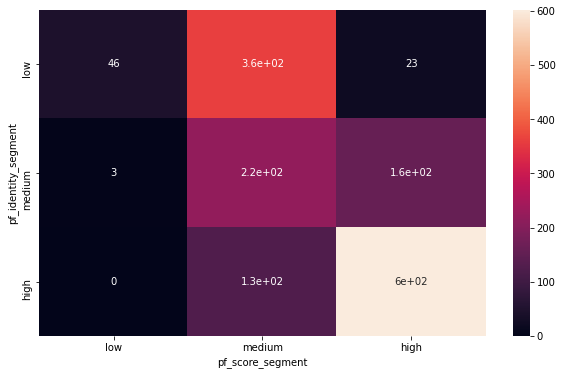

In [70]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(df['pf_identity_segment'], df['pf_score_segment'])
seaborn.heatmap(exp, annot=True)

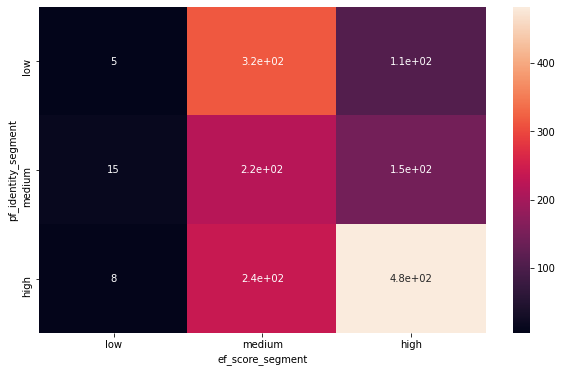

In [71]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(df['pf_identity_segment'], df['ef_score_segment'])
seaborn.heatmap(exp, annot=True)

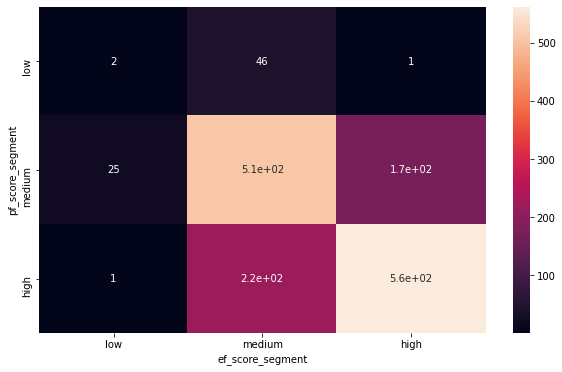

In [89]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(df['pf_score_segment'], df['ef_score_segment'])
seaborn.heatmap(exp, annot=True)

Los heatmaps confirman los análisis anteriores,la relación postiva es clara para ambos Scores, mientras que no lo es para el caso de Identidad contra Libertad Económica. En particular se puede apreciar como se condensa datos en los cuadrantes :high-high, y luego low-mid.

Test de Kendall:

In [155]:
import scipy.stats as st

In [236]:
st.kendalltau(df['pf_score'].dropna(), df['ef_score'].dropna())

KendalltauResult(correlation=0.5170373388583999, pvalue=6.803035046887151e-202)

En virtud del p-value, el test de Kendall rechaza la hipótesis nula de no asociación entre las variables, para los Scores de Economic y Human Freedom.

In [237]:
st.kendalltau(df['pf_score'].dropna(), df['pf_identity'].dropna())

KendalltauResult(correlation=0.5671144643973993, pvalue=2.4018208581600113e-210)

En el caso de comparar Personal Freedom Identity y Score, la relación es aún mayor, como se espera por construcción.

In [239]:
st.kendalltau(df['ef_score'].dropna(), df['pf_identity'].dropna())

KendalltauResult(correlation=0.2842261132949111, pvalue=3.3086316324742595e-54)

Soprendentemente, hay un grado de correlación entre Economic Freedom Score y Personal Freedom Identity, pero mucho menor a los anteriores tanto en valor como en significancia.

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [154]:
#dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset_distribution = dataset['pf_identity'].dropna()

In [156]:
# Test de Kolmogorov-Smirnov: comprueba si pf_identity ajusta a una normal
st.kstest(dataset_distribution, 'norm', args=([0, 1]))

KstestResult(statistic=0.9002838411677303, pvalue=0.0)

El resultado del test indica que la variable pf_identity no se ajuste a una función de distribución normal con parámetros 0, 1. Sin embargo, cabe mencionar que se debe considerar el tamaño de la muestra y la presencia de empates. El test de KS es sensible a la presencia de valores iguales por lo que debe ser interpretado con cautela. 

In [174]:
def get_normalized_variable(dataset, variable):
    """
    This method will be used to normalize a variable within a defined dataset
    """
    mean, std = st.norm.fit(dataset[variable].dropna())
    return (dataset[variable].dropna() - mean) / std

In [175]:
pf_identity_normalized = get_normalized_variable(dataset, 'pf_identity')

# Test de Kolmogorov-Smirnov: comprueba si pf_identity ajusta a una normal
st.kstest(pf_identity_normalized, 'norm', args=([0, 1]))

KstestResult(statistic=0.22123100734628914, pvalue=1.1136019711157535e-66)

In [185]:
def get_normalized_variable_2(dataset, variable):
    """
    This method will be used to normalize a variable within a defined dataset
    """
    working_dataset = dataset[variable].dropna()
    mean = working_dataset.mean()
    std = working_dataset.std()
    norm = (dataset[variable]- mean) / std
    norm.dropna(inplace=True)
    return norm

In [186]:
pf_identity_normalized_2 = get_normalized_variable_2(dataset, 'pf_identity')

In [187]:
# Test de Kolmogorov-Smirnov: comprueba si pf_identity ajusta a una normal
st.kstest(pf_identity_normalized_2, 'norm', args=([0, 1]))

KstestResult(statistic=0.22117579326428533, pvalue=1.2026957468454308e-66)

Incluso normalizando la variable de dos maneras diferentes, no se logra obtener una distribución normal.

Se propone un grid search para poder encontrar la distribución y sus parámetros: para ello determinar el tipo de función al  cual se intentará ajustar, y sus parámetros:

In [206]:
def distribution_search(dataset, 
                        proposed_distribution='norm', 
                        lower_limit_a=0, 
                        upper_limit_a=5, 
                        space_a = 0.05, 
                        lower_limit_b=0, 
                        upper_limit_b=5,
                        space_b=0.05,
                        n=100
                       ):

    a_ = np.arange(lower_limit_a, upper_limit_a, space_a)
    b_ = np.arange(lower_limit_b, upper_limit_b, space_b)
    p_values = []
    for a in a_:
        for b in b_:
            p_value = st.kstest(rvs=list(dataset), cdf=proposed_distribution, args=(a,b), N=n)
            p_values.append(p_value)

    return p_values

In [229]:
distribution_search(dataset_distribution, 'gamma', 2, 5, 0.25, 0.5, 2, 0.25 )

[KstestResult(statistic=0.7427966229357712, pvalue=0.0),
 KstestResult(statistic=0.7290088758738578, pvalue=0.0),
 KstestResult(statistic=0.712317909452433, pvalue=0.0),
 KstestResult(statistic=0.6921868110800606, pvalue=0.0),
 KstestResult(statistic=0.6680078784956707, pvalue=0.0),
 KstestResult(statistic=0.6497935741111762, pvalue=0.0),
 KstestResult(statistic=0.7209143925328887, pvalue=0.0),
 KstestResult(statistic=0.7033191209829712, pvalue=0.0),
 KstestResult(statistic=0.682330200870115, pvalue=0.0),
 KstestResult(statistic=0.6574082554066365, pvalue=0.0),
 KstestResult(statistic=0.6427784518844556, pvalue=0.0),
 KstestResult(statistic=0.6286155821863131, pvalue=0.0),
 KstestResult(statistic=0.6948319459463314, pvalue=0.0),
 KstestResult(statistic=0.6731483146216786, pvalue=0.0),
 KstestResult(statistic=0.6485279326373432, pvalue=0.0),
 KstestResult(statistic=0.6359906871690946, pvalue=0.0),
 KstestResult(statistic=0.6210459051209761, pvalue=0.0),
 KstestResult(statistic=0.6033001

A pesar de varias búsquedas con distribuciones asintóticas izquierdas, no se logró encontrar un buen fit con alguna de ellas.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

In [198]:
# Coeficiente de correlación de Pearson
st.pearsonr(dataset['pf_identity'].dropna(), dataset['pf_score'].dropna())

(0.742208579903581, 1.2855665900792286e-269)

In [199]:
st.spearmanr(dataset['pf_identity'].dropna(), dataset['pf_score'].dropna(), axis=0)

SpearmanrResult(correlation=0.7313581415245098, pvalue=6.2822504661055415e-258)

Según el coeficiente de Pearson, hay una correlación de 0.69 entre pf_identity y pf_score, tal como esperamos por construcción.
Según el coeficiente de Spearman la relación es un poco menor.

Cabe mencionar que el coeficiente de correlacion de Pearson mide la asociación lineal entre variables por lo que se ve influenciado por las marginales. Mientras que el coeficiente de Spearman es no paramétrico y basado en ranks por lo que se independiza de las marginales.

In [200]:
st.pearsonr(dataset['pf_identity'].dropna(), dataset['ef_score'].dropna())

(0.3591510419500781, 4.2582257576930607e-48)

In [201]:
st.spearmanr(dataset['pf_identity'].dropna(), dataset['ef_score'].dropna(), axis=0)

SpearmanrResult(correlation=0.40077737030068, pvalue=1.6873618909139198e-60)

Según el coeficiente de Pearson, hay una correlación de 0.31 entre pf_identity y pef_score, demostrando un bajo nivel de relación, alineado con los gráficos anteriores.
Según el coeficiente de Spearman la relación es apenas menor.
Notar que en ambos casos si bien el p-value es lo suficientemente pequeño como para validar el coeficiente, es menor que en los otros casos analizados.

In [202]:
st.pearsonr(dataset['pf_score'].dropna(), dataset['ef_score'].dropna())

(0.6736629349550599, 3.0886221296012145e-204)

In [203]:
st.spearmanr(dataset['pf_score'].dropna(), dataset['ef_score'].dropna(), axis=0)

SpearmanrResult(correlation=0.7107413891778127, pvalue=3.194041345782152e-237)

Según el coeficiente de Pearson, hay una correlación de 0.67 entre pf_score y ef_score, mostrando que ambas estar relacionadas positivamente.
A diferencia de los casos anteriores, el coeficiente de Spearman es mayor que al de Pearson, e incluso muestra una mayor significancia. Esto puede deberse por un lado a que funciona mejor con rangos, y por otro, que usando una función monotónica puede capturar mejor relaciones no necesariamente lineales.